In [4]:
import subprocess as sp
import json as js
import matplotlib.pyplot as plt

In [14]:
def run(suite, *args, step=1000000, limit=20000000):
    i = step
    idx = (list(), list())
    time = (list(), list())
    rss = (list(), list())
    while i <= limit:
        output = sp.run(["build/btree", suite, "btree", str(i), *args], capture_output=True)
        obj = js.loads(output.stdout)
        time[0].append(obj["time"])
        rss[0].append(obj["rss"])
        idx[0].append(i)
        i = i + step
    i = step
    while i <= limit:
        output = sp.run(["build/btree", suite, "libc", str(i), *args], capture_output=True)
        obj = js.loads(output.stdout)
        time[1].append(obj["time"])
        rss[1].append(obj["rss"])
        idx[1].append(i)
        i = i + step
    return idx, time, rss

In [18]:
def run_and_plot(title, suite, *args, step=1000000, limit=20000000):
    idx, time, rss = run(suite, *args, step=step, limit=limit)
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.set_title(title + " (Time)")
    ax1.scatter(idx[0], time[0], label="btree", marker='+')
    ax1.scatter(idx[1], time[1], label="libc", marker='x')
    ax1.legend()
    
    ax2 = fig.add_subplot(212)
    ax2.set_title(title + " (RSS)")
    ax2.scatter(idx[0], rss[0], label="btree", marker='+')
    ax2.scatter(idx[1], rss[1], label="libc",  marker='x')
    ax2.legend()
    fig.tight_layout(pad=2)


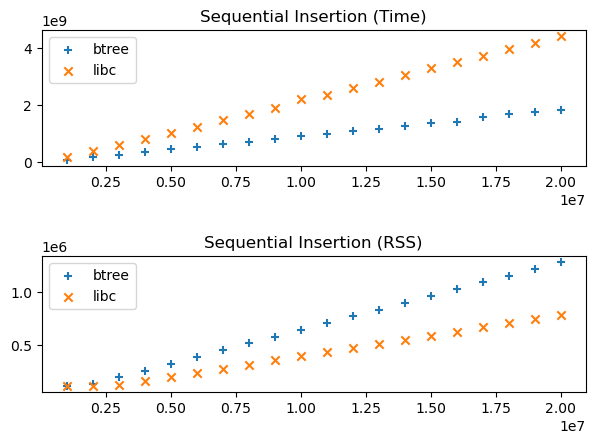

In [7]:
run_and_plot("Sequential Insertion", "seqins")

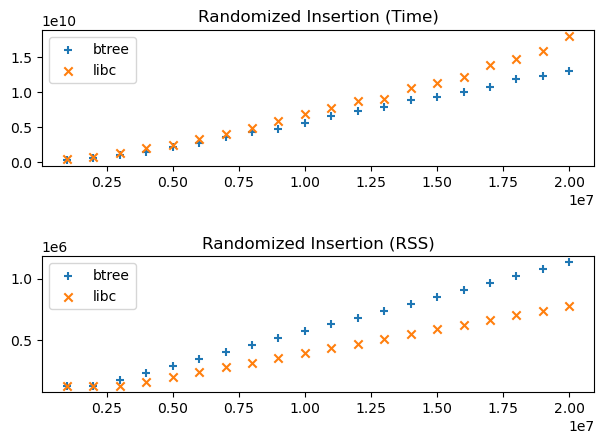

In [8]:
run_and_plot("Randomized Insertion", "randins", "6364136223846793005")

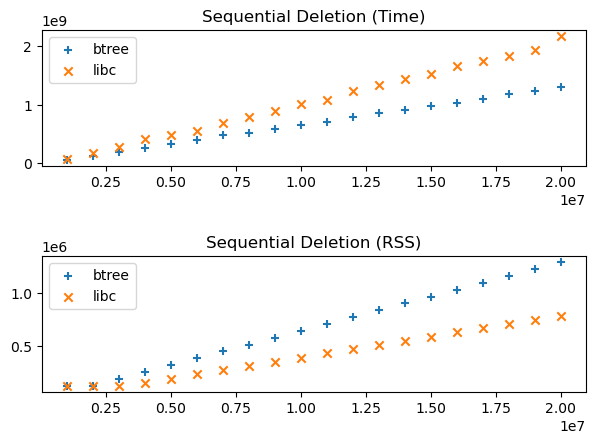

In [9]:
run_and_plot("Sequential Deletion", "seqdel")

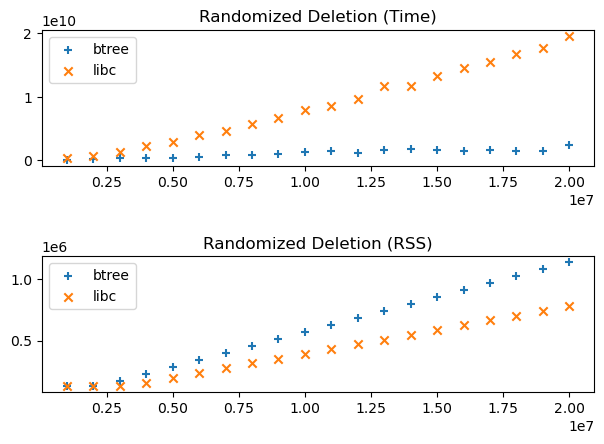

In [10]:
run_and_plot("Randomized Deletion", "randdel", "6364136223846793005")

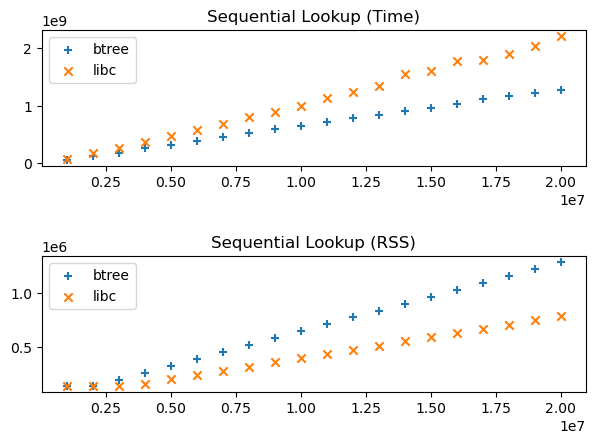

In [11]:
run_and_plot("Sequential Lookup", "seqlookup")

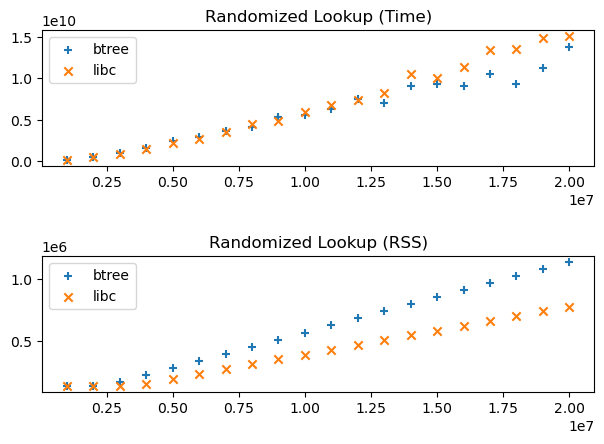

In [12]:
run_and_plot("Randomized Lookup", "randlookup", "6364136223846793005")

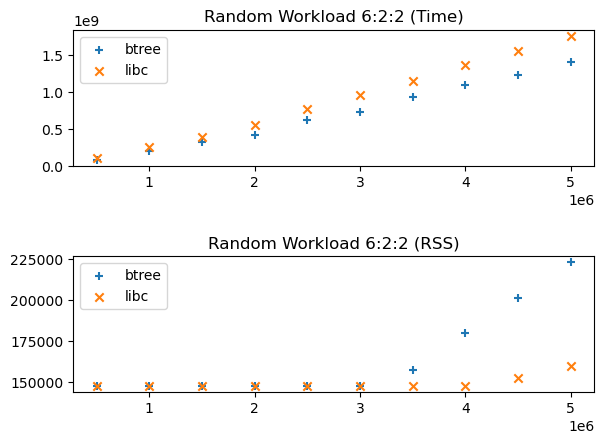

In [22]:
run_and_plot("Random Workload 6:2:2", "randwork", "6364136223846793005", "0.6", "0.2", step=500000, limit=5000000)

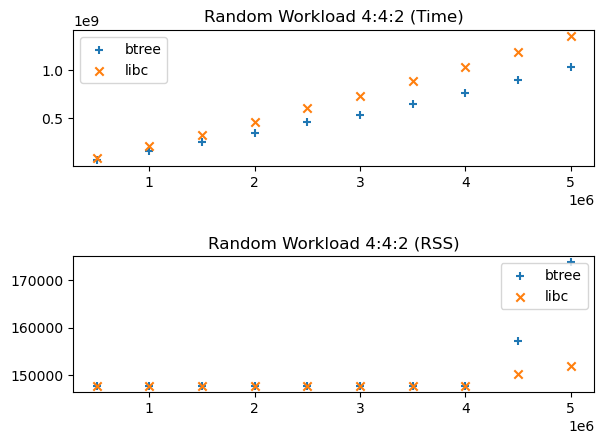

In [24]:
run_and_plot("Random Workload 4:4:2", "randwork", "6364136223846793005", "0.4", "0.4", step=500000, limit=5000000)

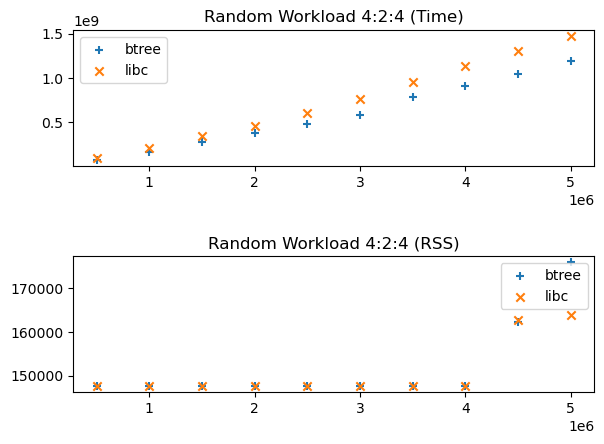

In [25]:
run_and_plot("Random Workload 4:2:4", "randwork", "6364136223846793005", "0.4", "0.2", step=500000, limit=5000000)

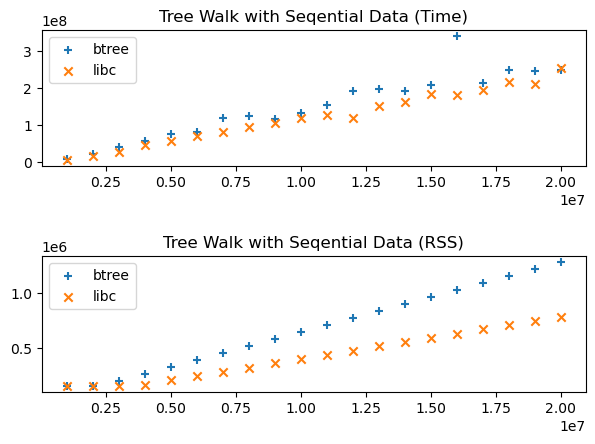

In [26]:
run_and_plot("Tree Walk with Seqential Data", "walkseq")

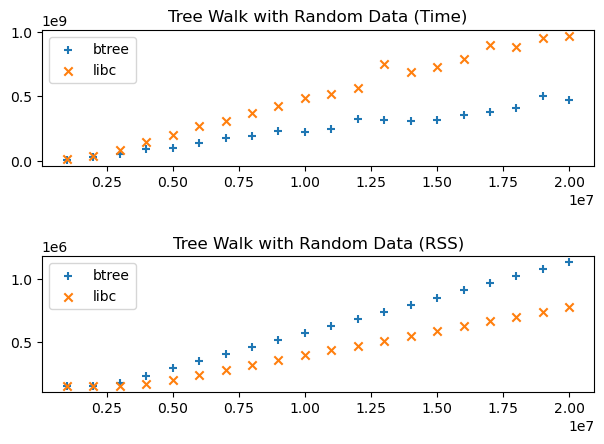

In [27]:
run_and_plot("Tree Walk with Random Data", "walkrand", "6364136223846793005")